In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.manifold import TSNE
from keras.preprocessing import image
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout
from collections import Counter


In [ ]:
stim_dir = 'stimuli/'
stimlist_dir = '/home/joshini/simlink_dataset/stim_lists'
activations_dir = '/home/ramanha/imageActivation'

subj_lists = sorted([os.path.join(stimlist_dir,f) for f in os.listdir(stimlist_dir) if os.path.isfile(os.path.join(stimlist_dir,f))])
subj_act = sorted([os.path.join(activations_dir,f) for f in os.listdir(activations_dir) if os.path.isfile(os.path.join(activations_dir,f))])

# Only for sub-CSI1
stimlistfile, actfile = subj_lists[0], subj_act[0] 
stimlist = np.loadtxt(stimlistfile, dtype = str)
activations = np.load(actfile, allow_pickle = True)
image2act = {}
image2db = {}
for img,act in zip(stimlist,activations):
    if img in image2act or 'rep' in img:
        continue
    else:
        image2act[img] = act
    if 'COCO' in img:
        image2db[img] = 'COCO'
    elif 'JPEG' in img:
        image2db[img] = 'ImageNet'
    else:
        image2db[img] = 'Scene'

dbcount = Counter(image2db.values())
print('%d images' % len(image2act))
print('COCO: %d' % dbcount['COCO'])
print('ImageNet: %d' % dbcount['ImageNet'])
print('Scene: %d' % dbcount['Scene'])

####Visualize image clusters using tSNE

In [4]:
X = np.array([image2act[img] for img in sorted(image2act.keys())])
X_emb = TSNE(n_components = 2, verbose = 1).fit_transform(X)

NameError: name 'image2act' is not defined

In [33]:
X.shape

(4912, 2048)

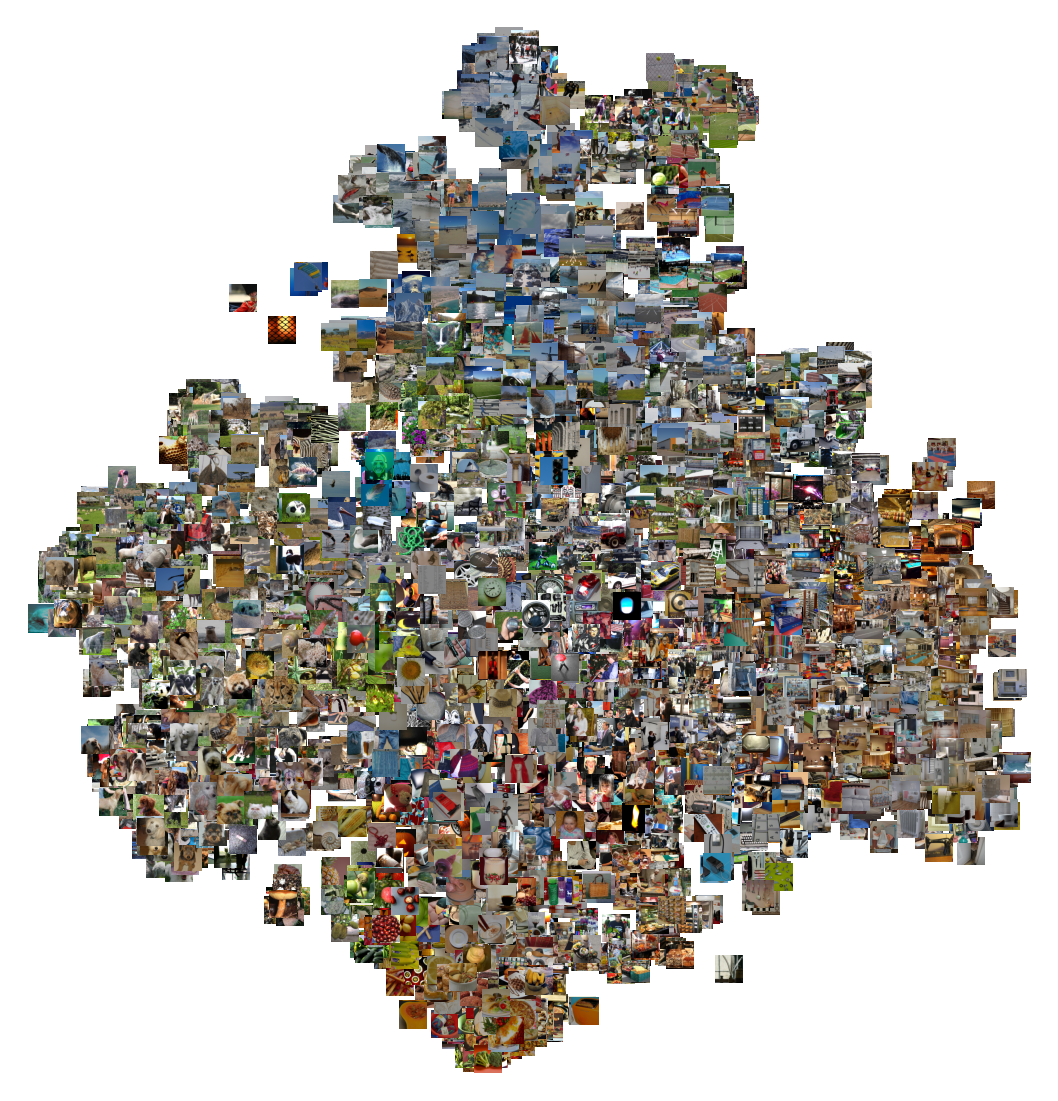

In [34]:
# Size of one side of image, in terms of the embedding dimension
s = 2
# Map from image file to embedding coordinates
image2emb = {x: X_emb[ind] for ind, x in enumerate(sorted(image2act.keys()))}
stim_dir = "/home/ramanha/dataset/all_presented_stimuli/"
plt.close('all')
fig, ax = plt.subplots(1,1,figsize=(20,20))
ax.set_xlim([np.min(X_emb[:,0]) - 5,np.max(X_emb[:,0]) + 5])
ax.set_ylim([np.min(X_emb[:,1]) - 5,np.max(X_emb[:,1]) + 5])

# Plot each image
for x in image2emb:
    filepath = os.path.join(stim_dir,x)
    img = image.load_img(filepath, target_size=(224, 224))
    img = image.img_to_array(img).astype(np.uint8)
    left, right, bottom, top = image2emb[x][0] - s, image2emb[x][0] + s, image2emb[x][1] - s, image2emb[x][1] + s

    ax.imshow(img, extent = [left,right,bottom,top])

plt.axis('off')
plt.savefig('stimuli_resnet_tsne.png', dpi = 300)
plt.show()



K-means clustering on the embedding and hyperparameter search

Cluster the embedding with a specified k, assign new labels, then run a classifier with those labels. Perform randomized hyperparameter search.

Hyperparameters:
- Number of clusters, k

In [35]:
from sklearn.cluster import KMeans

K = np.arange(2,31,1)
error = []

for k in K:
    print('k = %d' % k)
    inertia = []
    # Run a few times since initial conditions are random
    for i in range(20):
        kmeans = KMeans(n_clusters = k).fit(X_emb)
        inertia.append(kmeans.inertia_)
    error.append(np.mean(kmeans.inertia_))

k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14
k = 15
k = 16
k = 17
k = 18
k = 19
k = 20
k = 21
k = 22
k = 23
k = 24
k = 25
k = 26
k = 27
k = 28
k = 29
k = 30


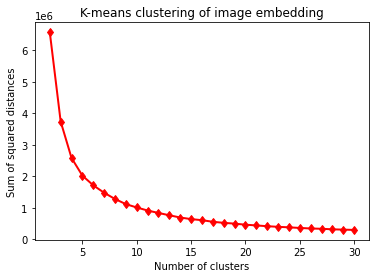

In [37]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(K,error,color='r',linewidth=2,marker='d')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Sum of squared distances')
ax.set_title('K-means clustering of image embedding')
plt.show()

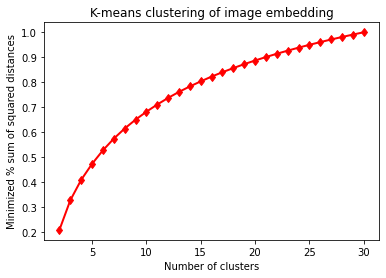

In [38]:
errsum = np.cumsum(error) / np.sum(error)
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(K,errsum,color='r',linewidth=2,marker='d')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Minimized % sum of squared distances')
ax.set_title('K-means clustering of image embedding')
plt.show()

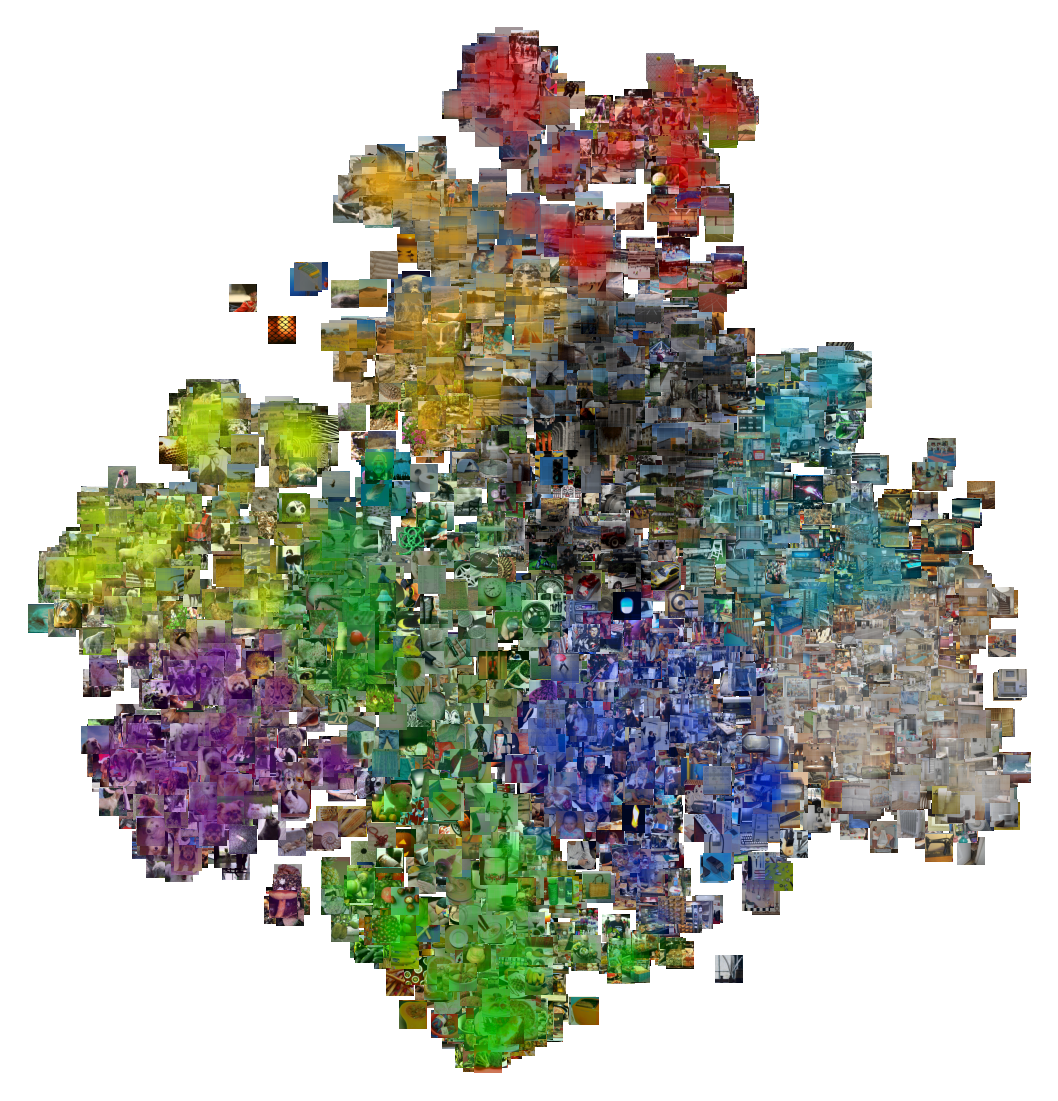

In [39]:
from matplotlib.patches import Rectangle
from sklearn.cluster import KMeans

bestK = 10
colors = plt.cm.nipy_spectral(np.linspace(0,1,bestK))
kmeans = KMeans(n_clusters = bestK).fit(X_emb)

plt.close('all')
fig, ax = plt.subplots(1,1,figsize=(20,20))
ax.set_xlim([np.min(X_emb[:,0]) - 5,np.max(X_emb[:,0]) + 5])
ax.set_ylim([np.min(X_emb[:,1]) - 5,np.max(X_emb[:,1]) + 5])

# Plot each image
for ind,x in enumerate(sorted(image2emb.keys())):
    filepath = os.path.join(stim_dir,x)
    img = image.load_img(filepath, target_size=(224, 224))
    img = image.img_to_array(img).astype(np.uint8)
    left, right, bottom, top = image2emb[x][0] - s, image2emb[x][0] + s, image2emb[x][1] - s, image2emb[x][1] + s
    xrect,yrect,wrect,hrect = image2emb[x][0] - s, image2emb[x][1] - s, 2*s, 2*s
    patch = Rectangle((xrect,yrect), wrect, hrect, linewidth=1, edgecolor='none', facecolor=colors[kmeans.labels_[ind]], alpha = 0.05)
    
    ax.imshow(img, extent = [left,right,bottom,top])
    ax.add_patch(patch)
    

plt.axis('off')
plt.savefig('stimuli_kmeans.png', dpi = 300)
plt.show()

In [40]:
os.getcwd()

'/home/joshini'

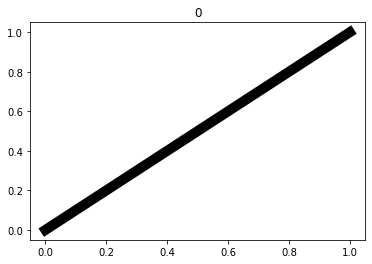

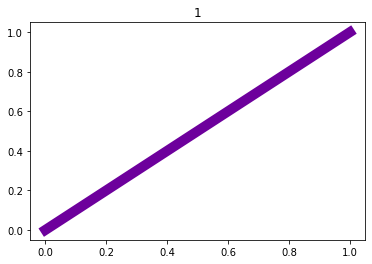

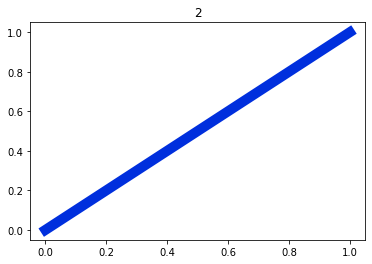

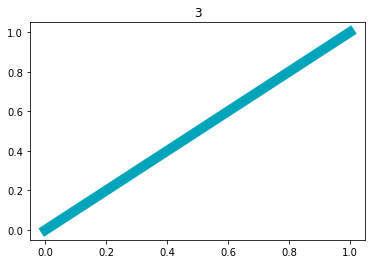

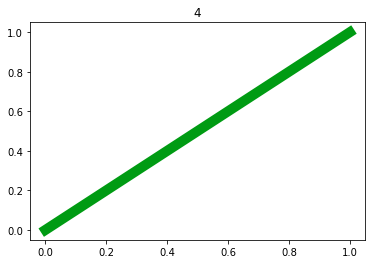

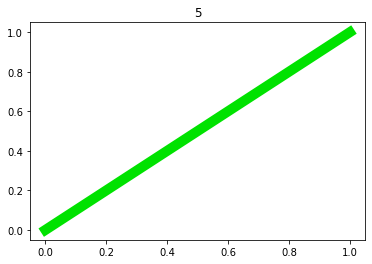

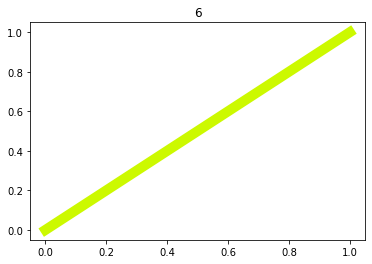

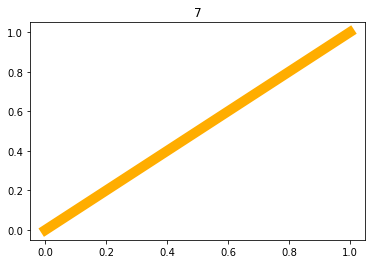

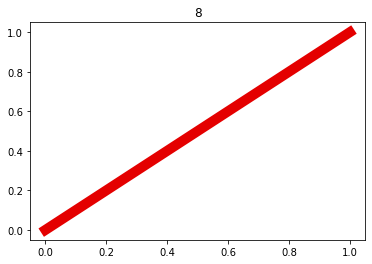

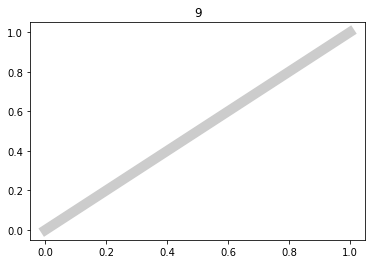

In [41]:
for cluster_num,color in enumerate(colors):
    plt.close('all')
    plt.plot([0,1],[0,1], color=color, linewidth=10)
    plt.title(cluster_num)
    plt.show()


In [43]:
#Export K-means clusters as semantic categorical labels
cluster2label = {0: 'public places',
                 1: 'animal faces',
                 2: 'people',
                 3: 'line patterned',
                 4: 'artifacts',
                 5: 'food items',
                 6: 'fauna',
                 7: 'landscapes',
                 8: 'outdoor spaces',
                 9: 'indoor spaces'
                }

In [44]:
import pandas as pd

semantic_labels = [cluster2label[cluster_num] for cluster_num in kmeans.labels_]
table = np.array([sorted(image2emb.keys()), kmeans.labels_, semantic_labels]).T
df = pd.DataFrame(data = table, columns = ['ImgName', 'ClusterNum', 'Category'])
df.to_csv('image_labels.tsv', sep='\t', header=False, index=False)


In [45]:
df.head()

,ImgName,ClusterNum,Category
0,ATM1.jpg,9,indoor spaces
1,ATM2.jpg,9,indoor spaces
2,ATM4.jpg,3,line patterned
3,ATM5.jpg,9,indoor spaces
4,COCO_train2014_000000000036.jpg,2,people
